In [1]:
# Import packages
import matplotlib.pyplot as plt
from looper import *
import pandas as pd
import numpy as np
% matplotlib inline

In [2]:
import plotly
print plotly.__version__            # version 1.9.4 required
plotly.offline.init_notebook_mode() # run at the start of every notebook

import plotly.plotly as py
import plotly.graph_objs as go


1.12.6


In [23]:
input_csv = './exp_52428_t.csv'

# Read input dataset
df_input = pd.read_csv(input_csv)# , header=None)
df_input.head()

/Users/PoonamRath/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning:

Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,24

Unnamed: 0    GSM1265874    GSM1265875            GSM1265876    GSM1265877  \
0     Status   Symptomatic   Symptomatic           Symptomatic   Symptomatic   
1       Time       5 hours      Baseline   Pre-Challenge Basel      12 hours   
2    Patient           001           001                   001           001   
3      Virus          H3N2          H3N2                  H3N2          H3N2   
4      RNF14       673.836       575.014              749.8965       887.824   

     GSM1265878    GSM1265879    GSM1265880    GSM1265881    GSM1265882  \
0   Symptomatic   Symptomatic   Symptomatic   Symptomatic   Symptomatic   
1    21.5 hours      84 hours      60 hours      29 hours    69.5 hours   
2           001           001           001           001           001   
3          H3N2          H3N2          H3N2          H3N2          H3N2   
4      835.4735      440.6725       530.964        479.56      648.6775   

       ...           GSM1266715     GSM1266716    GSM1266717     GSM1266718  \
0      ...         Asymptomatic   Asymptomatic   Symptomatic   Asymptomatic   
1      ...           93.5 hours     93.5 hours    93.5 hours     93.5 hours   
2      ...                  023            022           021            024   
3      ...                 H1N1           H1N1          H1N1           H1N1   
4      ...              242.255       272.5495       292.346       359.4415   

     GSM1266719            GSM1266720            GSM1266721  \
0   Symptomatic           Symptomatic          Asymptomatic   
1      53 hours   Pre-Challenge Basel   Pre-Challenge Basel   
2           021                   021                   024   
3          H1N1                  H1N1                  H1N1   
4      363.3955              376.2755              328.3605   

             GSM1266722            GSM1266723     GSM1266724  
0          Asymptomatic          Asymptomatic   Asymptomatic  
1   Pre-Challenge Basel   Pre-Challenge Basel     69.5 hours  
2                   023                   022            022  
3                  H1N1                  H1N1           H1N1  
4               231.346              230.3935       231.3685  

[5 rows x 650 columns]

In [42]:
# Transpose and massage input dataset
df_massaged = df_input.transpose()
df_massaged.columns = df_massaged.ix[0,:]
df_massaged.drop('Unnamed: 0', axis=0, inplace=True)

# Remove columns that are all NaNs
df_massaged.dropna(how='all', axis=1, inplace=True)

# Additional massaging and filtering
df_massaged['Time'] = [tm.split(' ')[1] for tm in df_massaged['Time']]
df_massaged = df_massaged[df_massaged['Status'].str.contains("Symptomatic")]
df_massaged = df_massaged[df_massaged['Virus'].str.contains("H1N1")]

# Reset index
df_massaged.reset_index(inplace=True, drop=True)

df_massaged.head()

Unnamed: 0        Status      Time Patient  Virus     RNF14   UBE2Q1  \
0            Symptomatic  Baseline     003   H1N1   299.141  1733.92   
1            Symptomatic  Baseline     002   H1N1  239.2705  1789.28   
2            Symptomatic        29     002   H1N1   271.942  1567.03   
3            Symptomatic        29     003   H1N1   343.142  2015.21   
4            Symptomatic      69.5     002   H1N1  291.3075  1611.99   

Unnamed: 0      RNF17     RNF10    RNF11     RNF13   ...         SELE  \
0            19.65805  6605.185  717.053  1397.095   ...      2.01953   
1            9.846785    3365.6  773.001   3442.12   ...     0.881593   
2            41.36465  3468.185  646.345   3293.98   ...      1.50499   
3             17.3786   8118.04  1059.42  1682.055   ...     0.653152   
4           12.963125  3911.525  665.708  3159.835   ...      1.14616   

Unnamed: 0  SLC7A10 TARP///TRGV5///TRGV3  SIGLEC1    GNGT1     SELT  \
0           5.87061              38.6907  55.9681  12.3989  600.969   
1           32.0404              7.65278   1092.6  1.46241   1176.6   
2           48.2737              55.9928   3226.3  3.30282  974.914   
3           3.68242              6.50251  54.7799  25.1809  710.149   
4           4.15829              26.3505  1238.33  1.47989  1190.24   

Unnamed: 0 DIAPH2-AS1 SERPINH1    FOLR3     SELP  
0             24.0814  17.6422  1737.97  439.282  
1             21.2325  13.3899  4007.81  386.316  
2             44.2688  16.3592  5019.32  339.635  
3             25.2129  12.7482  1707.91  358.738  
4             30.8947  6.59114  4750.12  433.077  

[5 rows x 13217 columns]

In [43]:
df_massaged = df_massaged.drop(df_massaged.columns[[0,3]],axis=1)
df_massaged.head()

Unnamed: 0      Time Patient     RNF14   UBE2Q1      RNF17     RNF10    RNF11  \
0           Baseline     003   299.141  1733.92   19.65805  6605.185  717.053   
1           Baseline     002  239.2705  1789.28   9.846785    3365.6  773.001   
2                 29     002   271.942  1567.03   41.36465  3468.185  646.345   
3                 29     003   343.142  2015.21    17.3786   8118.04  1059.42   
4               69.5     002  291.3075  1611.99  12.963125  3911.525  665.708   

Unnamed: 0     RNF13     REM1      UCHL5   ...         SELE  SLC7A10  \
0           1397.095  84.9433   109.1235   ...      2.01953  5.87061   
1            3442.12  72.9471  103.39495   ...     0.881593  32.0404   
2            3293.98  85.3161   109.1172   ...      1.50499  48.2737   
3           1682.055  39.1197     96.982   ...     0.653152  3.68242   
4           3159.835  70.3877   107.1435   ...      1.14616  4.15829   

Unnamed: 0 TARP///TRGV5///TRGV3  SIGLEC1    GNGT1     SELT DIAPH2-AS1  \
0                       38.6907  55.9681  12.3989  600.969    24.0814   
1                       7.65278   1092.6  1.46241   1176.6    21.2325   
2                       55.9928   3226.3  3.30282  974.914    44.2688   
3                       6.50251  54.7799  25.1809  710.149    25.2129   
4                       26.3505  1238.33  1.47989  1190.24    30.8947   

Unnamed: 0 SERPINH1    FOLR3     SELP  
0           17.6422  1737.97  439.282  
1           13.3899  4007.81  386.316  
2           16.3592  5019.32  339.635  
3           12.7482  1707.91  358.738  
4           6.59114  4750.12  433.077  

[5 rows x 13215 columns]

In [49]:
# Convert timepoint string to numbers
time_conv = []
for tm in df_massaged['Time']:
    if tm=='Baseline':
        time_conv.append(0)
    elif tm=='Pre-Challenge':
        time_conv.append(-1)
    else:
        time_conv.append(float(tm))

df_massaged.Time = time_conv
df_massaged.head()

Unnamed: 0  Time Patient     RNF14   UBE2Q1      RNF17     RNF10    RNF11  \
0            0.0     003   299.141  1733.92   19.65805  6605.185  717.053   
1            0.0     002  239.2705  1789.28   9.846785    3365.6  773.001   
2           29.0     002   271.942  1567.03   41.36465  3468.185  646.345   
3           29.0     003   343.142  2015.21    17.3786   8118.04  1059.42   
4           69.5     002  291.3075  1611.99  12.963125  3911.525  665.708   

Unnamed: 0     RNF13     REM1      UCHL5   ...         SELE  SLC7A10  \
0           1397.095  84.9433   109.1235   ...      2.01953  5.87061   
1            3442.12  72.9471  103.39495   ...     0.881593  32.0404   
2            3293.98  85.3161   109.1172   ...      1.50499  48.2737   
3           1682.055  39.1197     96.982   ...     0.653152  3.68242   
4           3159.835  70.3877   107.1435   ...      1.14616  4.15829   

Unnamed: 0 TARP///TRGV5///TRGV3  SIGLEC1    GNGT1     SELT DIAPH2-AS1  \
0                       38.6907  55.9681  12.3989  600.969    24.0814   
1                       7.65278   1092.6  1.46241   1176.6    21.2325   
2                       55.9928   3226.3  3.30282  974.914    44.2688   
3                       6.50251  54.7799  25.1809  710.149    25.2129   
4                       26.3505  1238.33  1.47989  1190.24    30.8947   

Unnamed: 0 SERPINH1    FOLR3     SELP  
0           17.6422  1737.97  439.282  
1           13.3899  4007.81  386.316  
2           16.3592  5019.32  339.635  
3           12.7482  1707.91  358.738  
4           6.59114  4750.12  433.077  

[5 rows x 13215 columns]

In [50]:
for time_pt in df_massaged.Time.unique():
    print "Timept: {}, # of entries: {}".format(time_pt, df_massaged.query("Time=={}".format(time_pt)).shape[0])

Timept: 0.0, # of entries: 12
Timept: 29.0, # of entries: 12
Timept: 69.5, # of entries: 11
Timept: 12.0, # of entries: 12
Timept: 5.0, # of entries: 12
Timept: 45.5, # of entries: 12
Timept: 36.0, # of entries: 12
Timept: 60.0, # of entries: 12
Timept: 21.5, # of entries: 12
Timept: 84.0, # of entries: 12
Timept: 77.0, # of entries: 12
Timept: 108.0, # of entries: 12
Timept: 101.0, # of entries: 12
Timept: 93.5, # of entries: 12
Timept: 53.0, # of entries: 11
Timept: -1.0, # of entries: 12


In [52]:
all_indiv = filter_to_unique_genes(df_massaged) # Not needed in this case since all genes are unique
# all_indiv = df_massaged
all_indiv.shape

(190, 13213)

In [95]:
all_indiv.sort_values(by=['Patient','Time'], axis=0, inplace=True)

In [96]:
all_indiv.Patient.unique()

array([  2.,   3.,   6.,   7.,   8.,   9.,  10.,  12.,  13.,  17.,  20.,
        21.])

In [99]:
print all_indiv.Time.unique()

[  -1.     0.     5.    12.    21.5   29.    36.    45.5   53.    60.
   69.5   77.    84.    93.5  101.   108. ]


In [100]:
training_data = all_indiv.query("Patient<10.0")
test_data = all_indiv.query("Patient>=10.0")

In [101]:
# Create a composite individual
df_composite, df_composite_scaled = create_composite_profile(training_data, 'Time', [], True, time_pt_zero = 0) 

In [102]:
### PHASE-SHIFTED GENES From here

In [219]:
large_ranged_genes = get_large_ranged_genes(df_composite, prctile=10.0)
print len(large_ranged_genes)

1322


In [231]:
def get_smooth_genes(df, CUTOFF=0.01):
    smooth_genes = []
    for gene in df.columns:
        gene_data = df[gene].values
        if np.abs(gene_data[0]-gene_data[-1])/np.median(gene_data)<CUTOFF:
            smooth_genes.append(gene)
    return smooth_genes

smooth_genes = get_smooth_genes(df_composite, CUTOFF=0.02)
print len(smooth_genes)

1221


In [232]:
selected_genes = list(set(smooth_genes).intersection(set(large_ranged_genes)))
print len(selected_genes)

108


In [233]:
for off in range(1,8):
    psgenes_dict = get_phase_shifted_genes(df_composite[selected_genes], CUTOFF=1,
                                           PROXIMITY=df_composite[selected_genes].median().median(), 
                                           override_offset=True, 
                                           outside_offset=off)
    print '\n'
    print "At offset {}: Pairs are {}".format(off, psgenes_dict)
    print '\n'

ADD3  TARP///TRGC2  CHSY1  RPS4X  TALDO1  SEMA4A  MIR1244-2///MIR1244-3///MIR1244-1///PTMAP5///PTMA  LOC652493///IGKV1D-8///IGKV1-5///IGKC  CXCR2  HBQ1  EIF3G  CAPN2  MBNL1  ATP6V0D1  CTSB  PCBP1  OSBPL8  TNIP1  RPS15A  ABHD3  SETD5  ADCY7  INPP5D  C6orf62  RUNX3  UBB  ZNF217  ATP6V1F  CYB5R3  CCL5  PABPC1  RPL3  SRSF5  XPO6  GNAI2  TUBA1A  ERP29  ANXA11  RBM39  ARPC3  ARPC2  GNAS  G6PD  ATP6V1G1  EMC3  ATXN7  EIF4A1  ATP5A1  CAPNS1  NCF4  RAP1A  CCR3  RNASET2  CREG1  PTPRCAP  SET  ARF1  SERF2  HNRNPK  SLC7A7  HNRNPC  MORF4L1  KIAA0430  RBL2  SULT1A1  SATB1  CD8A  RNF24  WAS  MAEA  VPS35  LRRFIP1  TAPBP  RPL10A  CTDSP2  FBL  KARS  SPCS1  CYFIP2  EEF1A1  RPS18  ALOX5AP  WDR82  ELF1  CEBPB  GABARAPL2  HAGH  NAP1L1  IMPDH2  KLF6  CXCR1  KLF2  CXCR4  ATP6V1B2  LDHB  FCGR3B///FCGR3A  VCL  HNRNPA1P10///HNRNPA1L2///HNRNPA1  ALDOA  VAMP3  SLC20A1  HMBOX1  ACTR3  NOTCH1  IGHA2///IGHA1  PTPRC  TUBA1B  FOLR3  

At offset 1: Pairs are {'TAPBP': ['ATXN7'], 'ATP6V1G1': ['KARS']}


ADD3  TARP///TRGC2

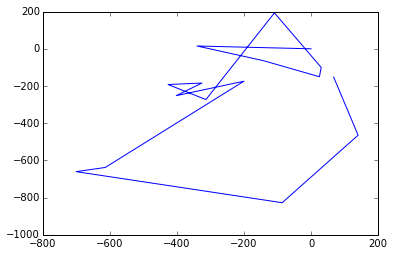

In [242]:
%matplotlib inline
x = df_composite_scaled['TNIP1']
y = df_composite_scaled['HNRNPK']
plt.plot(x,y)
plt.show()

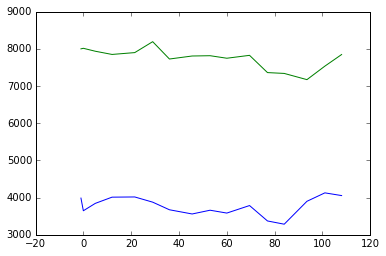

In [243]:
%matplotlib inline
x = df_composite['Time']
y = df_composite[['TNIP1','HNRNPK']]
plt.plot(x,y)
plt.show()

In [127]:
# for gene1 in psgenes_dict.keys():
geneAs = ['Serpina3g'] #,'KMO','CXCL3','IL6','MAMLD1','CCL4']
traces = []
for gene1 in geneAs:#psgenes_dict.keys():
    for gene2 in psgenes_dict[gene1]:
        xdata = df_composite[gene1]
        ydata = df_composite[gene2]
        traces.append(go.Scatter(x=xdata, y=ydata, mode='lines+markers', name='{}:{}'.format(gene1,gene2)))

plotly.offline.iplot(traces)

In [128]:
# Export data for selected genes to separate CSVs
merge_lists = lambda lst_a, lst_b: list(set(lst_a).union(set(lst_b)))
cols_for_export = merge_lists(psgenes_dict.keys(),['Time'])
for lst in psgenes_dict.values():
    cols_for_export = merge_lists(cols_for_export, lst)

training_data.ix[:,cols_for_export].to_csv("mouse_malaria_exported_data_training.csv", index=False)
test_data.ix[:,cols_for_export].to_csv("mouse_malaria_exported_data_test.csv", index=False)
#test_data.to_csv("human_monocyte_exported_data_test.csv")

In [129]:
def compute_distance(pt1, pt2):
    # Assuming that these pts. are lists of 2 numbers each
    dist = np.sqrt((pt1[0] - pt2[0])**2  +  (pt1[1] - pt2[1])**2)
    return dist

# For each individual's biggest gene pair loops, measure and report accuracy
def predict_accuracy(training_data, test_data, cols, verbose=False):
    K = 3 # Used to control number of neighbors used

    df1 = test_data
    df2 = training_data

    distances = {}
    mode_time = {}
    pred_list = []

    for ii in df1.index:
        pt1 = df1.ix[ii,cols].values
        dist_list = []
        # Compute distances to all training data
        for jj in df2.index:
            pt2 = df2.ix[jj,cols].values
            dist = compute_distance(pt1, pt2)
            # print 'Distance between {} and {}: {}'.format(pt1, pt2, dist)
            dist_list.append((jj, dist))

        distances[ii] = dist_list

        # Find the K nearest neighbors (set 3 since there are 3 different people in the training dataset)
        knn = list(zip(*sorted(dist_list, key = lambda row: row[1])[:K])[0])
        time_pts_for_knn = np.median(df2.ix[knn,'Time'].values)
        mode_time[ii] = time_pts_for_knn
        
    acc_count = 0
    time_acc_count = 0
    for ii in mode_time.keys():
        time_actual = test_data.ix[ii,'Time']
        time_pred = mode_time[ii]
        if verbose==True:
            print '{},{}'.format(time_actual, time_pred)
        pred_list.append(time_pred)
        if time_actual==time_pred:
            time_acc_count += 1
            
    return float(acc_count)/len(mode_time.keys()), float(time_acc_count)/len(mode_time.keys()), pred_list

In [130]:
def predict_accuracy_for_single_gene(training_data, test_data, gene, verbose='False'):
    K = 3
    df1 = test_data
    df2 = training_data
    
    distances = {}
    mode_time = {}
    pred_list = []

    for ii in df1.index:
        pt1 = df1.ix[ii,gene]
        dist_list = []
        # Compute distances to all training data
        for jj in df2.index:
            pt2 = df2.ix[jj,gene]
            dist = abs(pt2-pt1)
            # print 'Distance between {} and {}: {}'.format(pt1, pt2, dist)
            dist_list.append((jj, dist))

        distances[ii] = dist_list

        # Find the K nearest neighbors (set 3 since there are 3 different people in the training dataset)
        knn = list(zip(*sorted(dist_list, key = lambda row: row[1])[:K])[0])
        time_pts_for_knn = np.median(df2.ix[knn,'Time'].values)
        mode_time[ii] = time_pts_for_knn
        
    acc_count = 0
    time_acc_count = 0
    for ii in mode_time.keys():
        time_actual = test_data.ix[ii,'Time']
        time_pred = mode_time[ii]
        if verbose==True:
            print '{},{}'.format(time_actual, time_pred)
        pred_list.append(time_pred)
        if time_actual==time_pred:
            time_acc_count += 1
        else:
            print 'Actual, Predicted: {},{}'.format(time_actual, time_pred)
            
    return float(acc_count)/len(mode_time.keys()), float(time_acc_count)/len(mode_time.keys()), pred_list

In [36]:
# Compute accuracy on test data for each single gene using training data
gene_accuracy = pd.DataFrame(columns=['Gene','Accuracy'])
picked_acc_samples = []

for pair in gene_pairs:
    _, time_acc, pred_list = predict_accuracy_for_single_gene(training_data, test_data, pair[0])
    print 'For gene: {}, time accuracy: {}'.format(pair[0], time_acc)
    gene_accuracy.loc[len(gene_accuracy),:] = (pair[0], time_acc)
    picked_acc_samples.append(time_acc)
    
    _, time_acc, pred_list = predict_accuracy_for_single_gene(training_data, test_data, pair[1])
    print 'For gene: {}, time accuracy: {}'.format(pair[1], time_acc)
    gene_accuracy.loc[len(gene_accuracy),:] = (pair[1], time_acc)
    picked_acc_samples.append(time_acc)

Actual, Predicted: 2.0,14.0
Actual, Predicted: 2.5,14.0
Actual, Predicted: 3.0,4.0
Actual, Predicted: 3.5,3.0
Actual, Predicted: 14.0,2.5
Actual, Predicted: 48.0,24.0
Actual, Predicted: 48.0,24.0
Actual, Predicted: 48.0,24.0
For gene: IL1A, time accuracy: 0.75
Actual, Predicted: 2.0,0.0
Actual, Predicted: 2.5,0.0
Actual, Predicted: 3.0,48.0
Actual, Predicted: 3.5,48.0
Actual, Predicted: 4.0,24.0
Actual, Predicted: 4.0,24.0
Actual, Predicted: 4.0,24.0
Actual, Predicted: 4.0,24.0
Actual, Predicted: 4.0,24.0
Actual, Predicted: 14.0,4.0
Actual, Predicted: 24.0,48.0
Actual, Predicted: 24.0,4.0
For gene: MCOLN2, time accuracy: 0.625
Actual, Predicted: 2.0,14.0
Actual, Predicted: 2.5,14.0
Actual, Predicted: 3.0,4.0
Actual, Predicted: 3.5,3.0
Actual, Predicted: 14.0,2.5
Actual, Predicted: 48.0,24.0
Actual, Predicted: 48.0,24.0
Actual, Predicted: 48.0,24.0
For gene: IL1A, time accuracy: 0.75
Actual, Predicted: 0.0,2.0
Actual, Predicted: 0.0,2.0
Actual, Predicted: 2.0,0.0
Actual, Predicted: 2.0,

In [37]:
gene_pair_accuracy = pd.DataFrame(columns=['Gene_1','Gene_2','Accuracy'])

picked_acc_samples = []

# Compute accuracy on test data for each gene pair using training data
for pair in gene_pairs:
    _, time_acc, pred_list = predict_accuracy(training_data, test_data, list(pair))
    print 'For pair: {}, time accuracy: {}'.format(pair, time_acc)
    gene_pair_accuracy.loc[len(gene_pair_accuracy),:] = (pair[0], pair[1], time_acc)
    picked_acc_samples.append(time_acc)

For pair: ('IL1A', 'MCOLN2'), time accuracy: 0.84375
For pair: ('IL1A', 'TNIP3'), time accuracy: 0.9375
For pair: ('IL1A', 'IL7R'), time accuracy: 0.8125
For pair: ('IL1A', 'EBI3'), time accuracy: 0.90625
For pair: ('IL6', 'MCOLN2'), time accuracy: 0.78125
For pair: ('IL6', 'CD274'), time accuracy: 0.8125


In [38]:
# Randomized gene pair - baseline
random_gene_pairs = []
num_of_pairs = 50

for ii in range(0, num_of_pairs):
    idx_1 = int(np.random.rand()*training_data.shape[1])
    idx_2 = int(np.random.rand()*training_data.shape[1])
    random_gene_pairs.append((training_data.columns[idx_1], training_data.columns[idx_2]))

In [39]:
time_acc_samples = []
for pair in random_gene_pairs:
    _, time_acc, pred_list = predict_accuracy(training_data, test_data, list(pair))
    print 'For pair: {}, time accuracy: {}'.format(pair, time_acc)
    time_acc_samples.append(time_acc)

For pair: ('MMP13', 'SNX7'), time accuracy: 0.09375
For pair: ('PTGFR', 'LSM7'), time accuracy: 0.34375
For pair: ('ERCC8', 'AURKB'), time accuracy: 0.46875
For pair: ('AKR1C4', 'LRP2BP'), time accuracy: 0.09375
For pair: ('TRIP13', 'RHBDL2'), time accuracy: 0.34375
For pair: ('CLDN12', 'C6orf226'), time accuracy: 0.6875
For pair: ('SGCB', 'SULF1'), time accuracy: 0.375
For pair: ('TUBA1A', 'TDRD7'), time accuracy: 0.90625
For pair: ('NCRNA00115', 'SH3PXD2A'), time accuracy: 0.46875
For pair: ('CNIH2', 'CYP2B7P1'), time accuracy: 0.40625
For pair: ('LYZL4', 'SNORA72'), time accuracy: 0.34375
For pair: ('NISCH', 'PODNL1'), time accuracy: 0.4375
For pair: ('LOC731223', 'C16orf7'), time accuracy: 0.34375
For pair: ('RNF11', 'C16orf79'), time accuracy: 0.5
For pair: ('DHRS9', 'ADORA3'), time accuracy: 0.6875
For pair: ('FSCN2', 'MDP-1'), time accuracy: 0.59375
For pair: ('KIAA1467', 'CTSB'), time accuracy: 0.65625
For pair: ('DUOXA2', 'SERPINA10'), time accuracy: 0.25
For pair: ('WNT11', '

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning:

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.



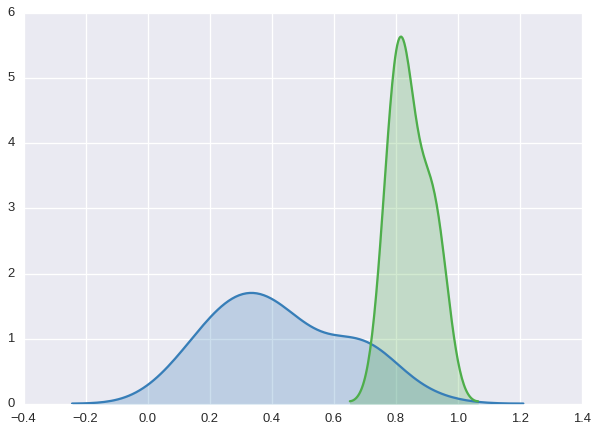

In [40]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.set_context("talk")
# with plt.style.context("fivethirtyeight"):
# #     sns.distplot(picked_acc_samples, bins=20)
_, c2, c3 = sns.color_palette("Set1", 3)
# sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
# sns.despine()
sns.kdeplot(np.array(time_acc_samples), shade=True, c=c2)
sns.kdeplot(np.array(picked_acc_samples), shade=True, c=c3)
plt.show()

In [41]:
from scipy.stats import ks_2samp
KSstat, KS_p_value = ks_2samp(time_acc_samples, picked_acc_samples)
print KSstat, KS_p_value

0.94 3.73924664056e-05
